In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

__Задача 1__

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти ширину доверительного интервала для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.

__Ответ__: 3.91992797

In [133]:
x = 80 #выборочное среднее
σ = 16 #среднее квадратичное отклонение
d = σ**2 #дисперсия
n = 256 #объём выборки
y = 0.95 #надёжность

In [134]:
ty = 4.126 #из таблицы условия

Найдем доверительный интервал для математического ожидания a с
надежностью 0,95

In [135]:
Dit = y/2*ty
Dit

1.95985

In [136]:
left = x - Dit * (σ/np.sqrt(n))
print ('Левая граница -', left)

Левая граница - 78.04015


In [137]:
right = x + Dit * (σ/np.sqrt(n))
print ('Правая граница -', right)

Правая граница - 81.95985


In [138]:
print ('Ответ:', left, '< Доверительный интервал <', right, '; длинной:', right-left)

Ответ: 78.04015 < Доверительный интервал < 81.95985 ; длинной: 3.919700000000006


__Задача 2__

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.

__Ответ__: 0.3145666

In [92]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

In [93]:
m = samples.mean() #среднее арифметическое

In [101]:
s = samples.std(ddof=1) #среднее квадратическое отклонение рассматриваемой случайной величины

In [102]:
samples.shape #размер выборки

(10,)

In [103]:
n = 10

In [104]:
# n-1
t_obj = stats.t(n - 1)
# 1 - alpha / 2
t = t_obj.ppf(1 - alpha / 2)
t

3.2498355440153697

In [106]:
c = [m - t * s / np.sqrt(n), m + t * s / np.sqrt(n)]

In [109]:
print ('Доверительный интервал:', c, 'занчение 200 входит в него. Гипотехз')

Доверительный интервал: [193.92322840036354, 203.07677159963646] , занчение 200 входит в него. Гипотеза продавца верна.


__Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.

__Ответ__: 1

In [29]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])

In [30]:
samples.mean() #среднее арифметическое

1.1084541666666665

In [31]:
samples.std(ddof=1) #среднее квадратическое отклонение рассматриваемой случайной величины

0.27936526343958135

In [32]:
samples.shape #размер выборки

(24,)

In [33]:
samples.std(ddof=1) / np.sqrt(samples.shape[0]) #среднее отклонение выборочных средних

0.057025195607097914

In [35]:
alpha = 0.05 #уровень значимости

In [36]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)
#криритическая область также будет двухсторонней
t1, t2 #квантили  tα/2  и  t1−α/2  стандартного нормального распределения

(-1.9599639845400545, 1.959963984540054)

In [37]:
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [38]:
def statistic(samples: np.ndarray) -> float:
    return (samples.mean() - 1) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [39]:
n = samples.shape[0]
S = statistic(samples)

n, S

(24, 1.9018640008517087)

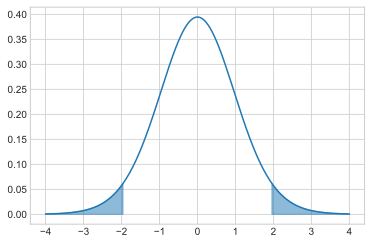

In [40]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

In [41]:
S = statistic(samples)
S

1.9018640008517087

In [42]:
print('alpha\tresult')
print('-------------')

for alpha in np.linspace(0, 0.15, 15):
    t1 = stats.t.ppf(alpha / 2, df=n - 1)
    t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
    
    print(round(alpha, 4), '\t', t1 <= S <= t2)

alpha	result
-------------
0.0 	 True
0.0107 	 True
0.0214 	 True
0.0321 	 True
0.0429 	 True
0.0536 	 True
0.0643 	 True
0.075 	 False
0.0857 	 False
0.0964 	 False
0.1071 	 False
0.1179 	 False
0.1286 	 False
0.1393 	 False
0.15 	 False


In [43]:
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.06978674686298825

In [44]:
stats.ttest_1samp(samples, popmean=1)

Ttest_1sampResult(statistic=1.901864000851709, pvalue=0.06978674686298816)